## Question 1:

In [3]:
#function 1
def temp_tester(normal_temp):    
    
    def embedded_tester(test_temp):
      if abs(normal_temp - test_temp) <=1.0:
        return (True)
      else:
        return(False)
  
    return embedded_tester

In [5]:
human_tester = temp_tester(37)
chicken_tester = temp_tester(41.1)

chicken_tester(42) # True -- i.e. not a fever for a chicken


True

In [6]:
human_tester(42)   # False -- this would be a severe fever for a human


False

In [7]:
chicken_tester(43) # False

False

In [8]:
human_tester(35)   # False -- too low

False

In [9]:
human_tester(98.6) # False -- normal in degrees F but our reference temp was in degrees C

False

## Question 2:

In [10]:
import pandas as pd
import sqlite3
with sqlite3.connect("hw1-population.db") as db:
    data = pd.read_sql_query("SELECT * FROM population", db)

### Examine data. What columns does it have? (2 points) How many rows (think: people) does it have? (2 points)

The dataset contains 4 columns and 152361 rows.



In [11]:
data

,name,age,weight,eyecolor
0,Edna Phelps,88.895690,67.122450,brown
1,Cara Yasso,9.274597,29.251244,brown
2,Gail Rave,18.345613,55.347903,brown
3,Richard Adams,16.367545,70.352184,brown
4,Krista Slater,49.971604,70.563859,brown
...,...,...,...,...
152356,John Fowler,23.930833,71.532569,blue
152357,Diana Shuffler,21.884819,67.936753,brown
152358,Kevin Cuningham,87.705907,60.074646,brown
152359,James Libengood,21.727666,81.774985,brown


### Examine the distribution of the ages in the dataset. In particular, be sure to have your code report the mean, standard deviation, minimum, maximum. (2 points) Plot a histogram of the distribution with an appropriate number of bins for the size of the dataset (describe in your readme the role of the number of bins). (3 points) Comment on any outliers or patterns you notice in the distribution of ages. (1 point)

In [13]:
data['age'].describe()

count    152361.000000
mean         39.510528
std          24.152760
min           0.000748
25%          19.296458
50%          38.468955
75%          57.623245
max          99.991547
Name: age, dtype: float64

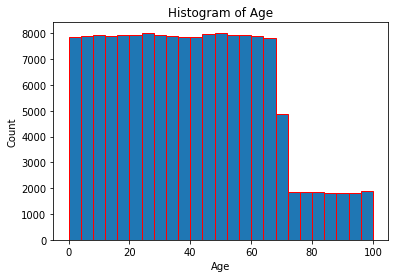

In [20]:
import matplotlib.pyplot as plt
plt.hist(data['age'], edgecolor="red", bins=25)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

I noticed in the produced histogram, there is a decrease in number of participants around 70 year old to 100 year old participants. No significant outlier is spotted inside the dataset. The distribution is more uniform, not normal. This indicates a sufficient number of participants in each age classes. 
The bin number is chosen to be 25. The reason why I used 25 to be the bin number is because our age ranges from 0 to 100. Picking 25, which is a relatively big divident of 100, enables us to see the change in distribution in a relatively small scale.

### Repeat the above for the distribution of weights. (3 points)

In [21]:
data['weight'].describe()

count    152361.000000
mean         60.884134
std          18.411824
min           3.382084
25%          58.300135
50%          68.000000
75%          71.529860
max         100.435793
Name: weight, dtype: float64

### Make a scatterplot of the weights vs the ages. (3 points) Describe the general relationship between the two variables (3 points). You should notice at least one outlier that does not follow the general relationship. What is the name of the person? (3 points) Be sure to explain your process for identifying the person whose values don't follow the usual relationship in the readme. (3 points)

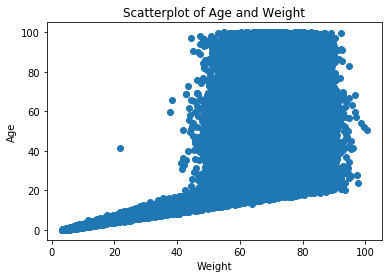

In [23]:
plt.scatter(data['weight'],data['age'])
plt.title('Scatterplot of Age and Weight')
plt.xlabel('Weight')
plt.ylabel('Age')
plt.show()

In [28]:
df_sub = data.loc[(data['weight']>=40)&(data['weight']<=45)&(data['age']>=20)&(data['age']<=23)]

In [29]:
df_sub

,name,age,weight,eyecolor
2487,Charles Portillo,22.28086,44.340342,brown


By observing this scatterplot, I have found that the relationship between weight and age are different within different age interval. For participants with an age smaller than 40, the age and weight are increasing in a positive linear relationship. For participants that is older than 40 years old and younger than 100 years old, the weight falls within an range of 40 to 100, with a bottom limitation in weight(minmum weight) that follows the linear relationship in the smaller than 40 year old interval. 

One outlier being noticed is the point at the middle of this scatterplot which apparently falls outside of the general trend. Using the values observed inside of the graph, I used a few subsetting conditions(weight within the range of 0 to 45, age within the range of 20 to 23), and found the name of the people as Charles Portillo.

### Question 3
Make a function that takes a list of state names and plots their new cases vs date using overlaid line graphs, one for each selected state. (Note: the data file shows running totals, so you'll have to process it to get new case counts.) Be sure to provide a way to tell which line corresponds to what state (one possibility: using colors and a legend). If your approach has any specific limitations, explain them in your readme. (4 points)

Test the above function and provide examples of it in use. (4 points)

Make a function that takes the name of a state and returns the date of its highest number of new cases. (4 points)

Make a function that takes the names of two states and reports which one had its highest number of daily new cases first and how many days separate that one's peak from the other one's peak. (5 points) (Edit: 2022-09-14: clarification that we're talking about the peak of daily new cases, not of the total number of cases.)

Test the above function and provide examples of it in use. (4 points)

In [30]:
import pandas as pd
data2 = pd.read_csv("us-states.csv")

In [87]:
import warnings
warnings.filterwarnings("ignore")

The date when this dataset is downloaded is September 19th, 2022. 

In [83]:
def find_subset_create_newcase(state_name):
  df_sub = data2.loc[data2['state']==state_name]
  df_sub['new_case'] = ''
  df_sub = df_sub.groupby('date')
  for i in range(0,len(df_sub)):
    if i == 0:
      df_sub['new_case'].iloc[0]=df_sub['cases'].iloc[0]
    else:
      df_sub['new_case'].iloc[i]=(df_sub['cases'].iloc[i]-df_sub['cases'].iloc[i-1])
  data2.loc[data2['state']==state_name] = df_sub



In [125]:
def plot_overlaid(list_of_state):
  statename = list_of_state
  data2['new_case']=''
  for name in (statename):
    find_subset_create_newcase(name)
  from matplotlib.pyplot import figure
  figure(figsize=(20, 18), dpi=80)
  for name in (statename):
    plt.plot(data2.loc[data2['state']==name]['date'], data2.loc[data2['state']==name]['new_case'], alpha=0.5, label = name)
  plt.plot()
  plt.title('Overlaid Line plots for Selected States')
  plt.xlabel('Time')
  plt.ylabel('New Cases')
  plt.legend()
  plt.show()

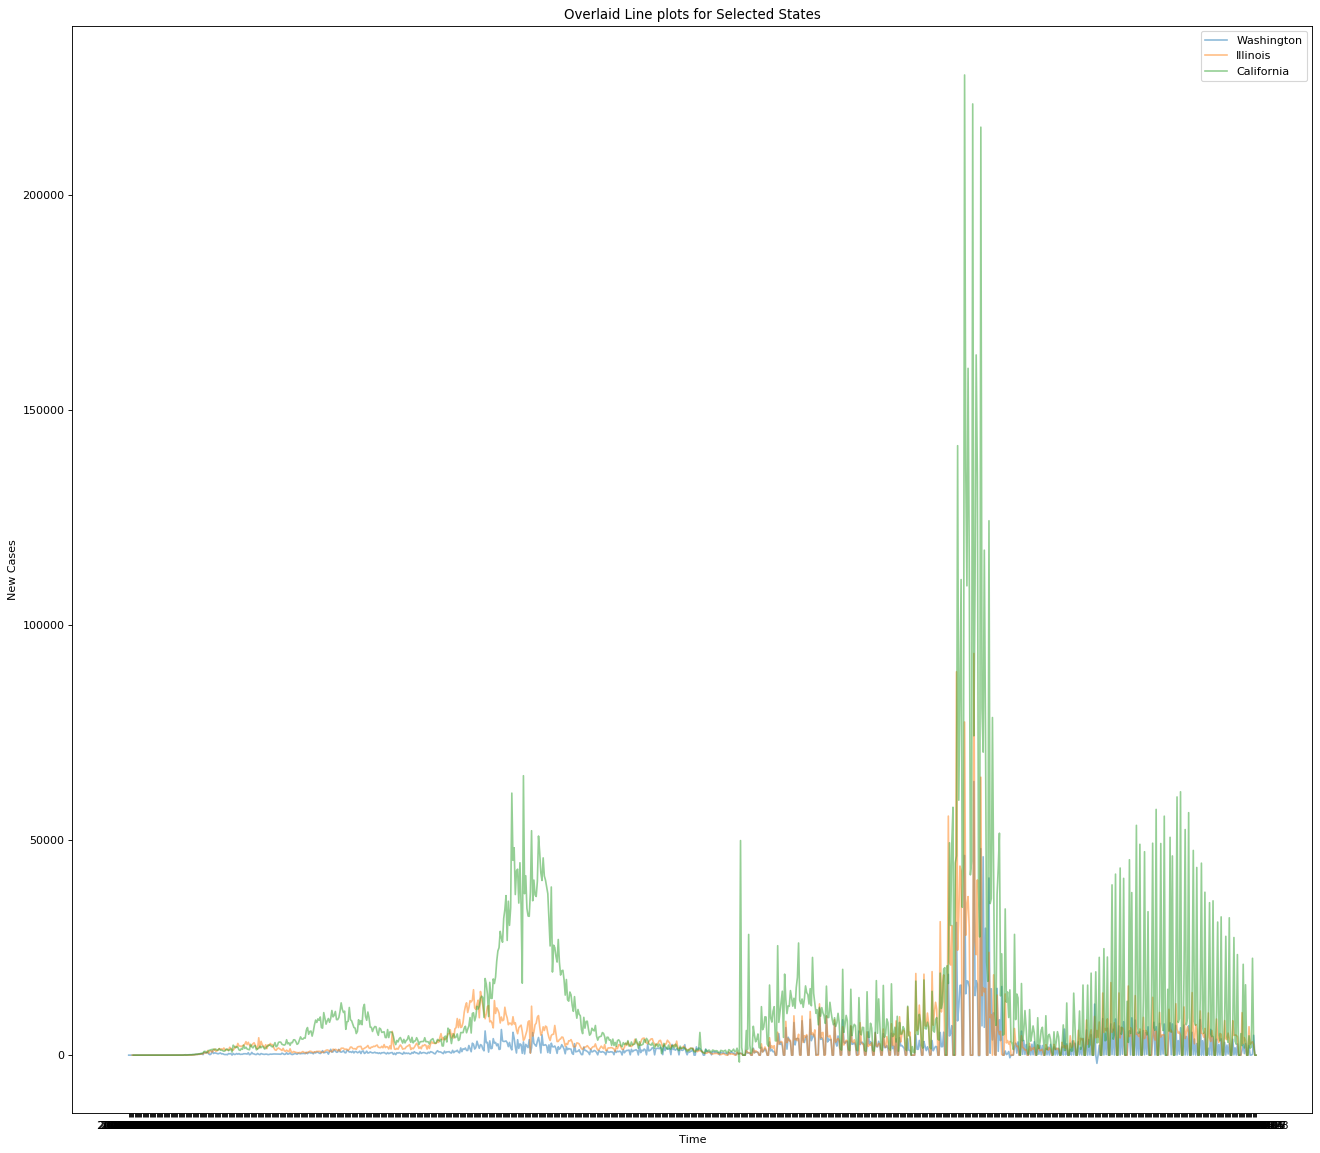

In [126]:
plot_overlaid(['Washington','Illinois','California'])

This function draws overlaid line graphs when provided with a list of state names. In this sample I have provided it a list of three states, and the lines are assigned with a opacity so overlapping lines will be able to shows up. There exists certain limitations to graph like this: 1. the lines are overlapping; 2. it is hard to see the exact numbers; 3. given the time range is too wide, it is hard to see exact time for each line.

In [148]:
#second function
import numpy as np
def return_max_new_case(list_of_state):
  for name in (list_of_state):
    find_subset_create_newcase(name)
    subset = data2.loc[data2['state']==name]
    print(subset.loc[subset['new_case'] == (subset['new_case'].max())])

In [150]:
return_max_new_case(['Washington','Illinois','California'])

             date       state  fips    cases  deaths new_case
37914  2022-01-18  Washington    53  1110011   10310    63640
             date     state  fips    cases  deaths new_case
37877  2022-01-18  Illinois    17  2686801   32851    93423
             date       state  fips    cases  deaths new_case
37419  2022-01-10  California     6  6311255   77412   227972


In [175]:
from datetime import datetime
def get_difference(date1, date2):
    delta = date2 - date1
    return delta.days

In [212]:
### third function
def find_peaks(list_of_two):
  for name in (list_of_two):
    find_subset_create_newcase(name)
  subset1 = data2.loc[data2['state']==list_of_two[0]]
  subset2 = data2.loc[data2['state']==list_of_two[1]]
  if subset1['new_case'].max() > subset2['new_case'].max():
    print(list_of_two[0]+' has the larger peak daily increase in covid cases than ' + list_of_two[1])
  elif subset1['new_case'].max() < subset2['new_case'].max():
    print(list_of_two[1]+' has the larger peak daily increase in covid cases than ' + list_of_two[0])
  else:
    print('Two states has the same number of max daily increase in covid cases')

  #report difference in dates
  d1 = list(subset1.loc[subset1['new_case'] == (subset1['new_case'].max())]['date'])[0]
  d2 = list(subset2.loc[subset2['new_case'] == (subset2['new_case'].max())]['date'])[0]
  d1 = datetime.strptime(str(d1), "%Y-%m-%d")
  d2 = datetime.strptime(str(d2), "%Y-%m-%d")
  days = abs(get_difference(d1, d2))
  print('The difference in peak time between the two states is ' + str(days) + ' days')

In [213]:
find_peaks(['Washington','California'])

California has the larger peak daily increase in covid cases than Washington
The difference in peak time between the two states is 8 days


### Question 5
Write Python code that reads the XML and reports:
the DescriptorName associated with DescriptorUI D007154 (the text of the name is nested inside a String tag) (5 points)
the DescriptorUI (MeSH Unique ID) associated with DescriptorName "Nervous System Diseases" (5 points)
the DescriptorNames of items in the MeSH hierarchy that are children of both "Nervous System Diseases" and D007154. (That is, each item is a subtype of both, as defined by its TreeNumber(s).) (5 points)

Explain briefly in terms of biology/medicine what the above search has found. (5 points)
Do these tasks using functions (e.g. write a generic function that returns DescriptorName given a DescriptorUI) instead of writing single use code. (5 points)

In [221]:
import xml.etree.ElementTree as ET

tree = ET.parse('desc2022.xml')
root = tree.getroot()



In [255]:
def find_descriptor_name_given_UI(des_UI):
  for record in root.iter("DescriptorRecord"):
    if record.find('DescriptorUI').text == des_UI:
      return(record.find('DescriptorName/String').text)



In [256]:
find_descriptor_name_given_UI('D007154')

Immune System Diseases


In [257]:
def find_descriptor_UI_given_name(des_name):
  for record in root.iter('DescriptorRecord'):
    if record.find("DescriptorName/String").text == des_name:
      return(record.find('DescriptorUI').text)
  

In [258]:
find_descriptor_UI_given_name('Nervous System Diseases')

D009422


In [259]:
def find_descriptor_name_given_UI_name(des_name,des_UI):
  #find our tree numbers
  for record in root.iter("DescriptorRecord"):
    if record.find('DescriptorUI').text == des_UI:
      num1 = (record.find('TreeNumberList/TreeNumber').text)
  for record in root.iter('DescriptorRecord'):
    if record.find("DescriptorName/String").text == 'Nervous System Diseases':
      num2 = (record.find('TreeNumberList/TreeNumber').text)

  #then proceed to storing lists of descriptor names
  
  stored_c10 =[]
  for record in root.iter('DescriptorRecord'):
    for tree_num_list in record.iter('TreeNumberList'):
      for tree_num in tree_num_list.iter('TreeNumber'):
        if (tree_num.text)[:3] == num1:
          stored_c10.append(record.find('DescriptorName/String').text)
  
  stored_c20 =[]
  for record in root.iter('DescriptorRecord'):
    for tree_num_list in record.iter('TreeNumberList'):
      for tree_num in tree_num_list.iter('TreeNumber'):
        if (tree_num.text)[:3] == num2:
          stored_c20.append(record.find('DescriptorName/String').text)

  #find overlapping names
  intersect_list = set([value for value in stored_c10 if value in stored_c20])
  return(intersect_list)



In [263]:
result = find_descriptor_name_given_UI_name('Nervous System Diseases','D007154')

In [262]:
len(result)

35